In [1]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
x = iris.data
y = iris.target

In [5]:
#### We have to Apply Standard Scaller----
scaller = StandardScaler()
x = scaller.fit_transform(x)

In [6]:
### -> y

In [7]:
y = y.reshape(-1, 1)

In [8]:
Ohe = OneHotEncoder()

In [9]:
Ohe = Ohe.fit_transform(y)

In [10]:
y = Ohe.toarray()

In [11]:
y[:4]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

#### Deep Learning Model 

In [13]:
model = Sequential()
model.add(Dense(30, activation = "relu", input_shape = (4,)))
model.add(Dense(10, activation = "relu"))
model.add(Dense(60, activation = "relu"))
model.add(Dense(40, activation = "relu"))


### Output Layer...
model.add(Dense(3, activation = "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [14]:
H = model.fit(trainX, trainY, validation_split=0.3, epochs=50, batch_size = len(trainY))

Epoch 1/50
1/1 [==============================] - 0s 166ms/step - loss: 1.0493 - accuracy: 0.3452 - val_loss: 0.9935 - val_accuracy: 0.4167
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 1.0306 - accuracy: 0.3571 - val_loss: 0.9724 - val_accuracy: 0.4167
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 1.0120 - accuracy: 0.3452 - val_loss: 0.9511 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.9934 - accuracy: 0.3571 - val_loss: 0.9305 - val_accuracy: 0.5278
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.9750 - accuracy: 0.4167 - val_loss: 0.9103 - val_accuracy: 0.5833
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.9572 - accuracy: 0.5119 - val_loss: 0.8904 - val_accuracy: 0.6111
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.9399 - accuracy: 0.5714 - val_loss: 0.8707 - val_accuracy: 0.6389
Epoch 8/50
1/1 [===========

In [15]:
loss = H.history["loss"]
val_loss = H.history["val_loss"]
accuracy = H.history["accuracy"]
val_accuracy = H.history["val_accuracy"]

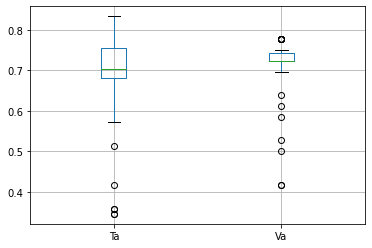

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
tva = pd.DataFrame({
    "Ta":accuracy,
    "Va":val_accuracy
})
tva.boxplot()
plt.show()

In [17]:
model.predict_classes(testX[1:2])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2], dtype=int64)

In [18]:
testY[1:2]

array([[0., 0., 1.]])

In [19]:
loss, Acc = model.evaluate(testX, testY)

1/1 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8333


In [20]:
Acc

0.8333333134651184